In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.set(style = "whitegrid")

In [6]:
df = pd.read_csv("../data/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.shape #check the no of rows and columns

(8807, 12)

In [8]:
#display basic info like data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
df.describe() # get summary statistics for numeric columns

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [12]:
df.isnull().sum() #check for missing values in each column

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [21]:
#fill missing values
df['director'].fillna('No Director',inplace=True)
df['country'].fillna('Unknown',inplace = True)
df['cast'].fillna('No cast',inplace = True)
#drop rows where date_added is missing
#df.dropna(subset=['date_added'],inplace= True)

C:\Users\shrim\AppData\Local\Temp\ipykernel_22304\1926830091.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('No Director',inplace=True)
C:\Users\shrim\AppData\Local\Temp\ipykernel_22304\1926830091.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [14]:
#remove duplicates
df.drop_duplicates(inplace= True)

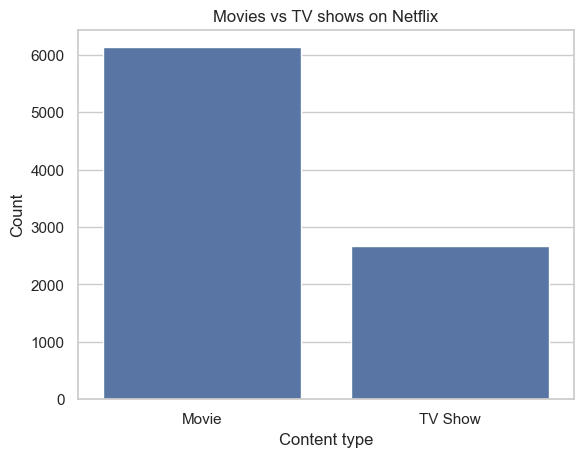

In [ ]:
#Plot distribution graph bar plot
sns.countplot(data=df,x='type')
plt.title('Movies vs TV shows on Netflix')
plt.xlabel('Content type')
plt.ylabel('Count')
plt.show()

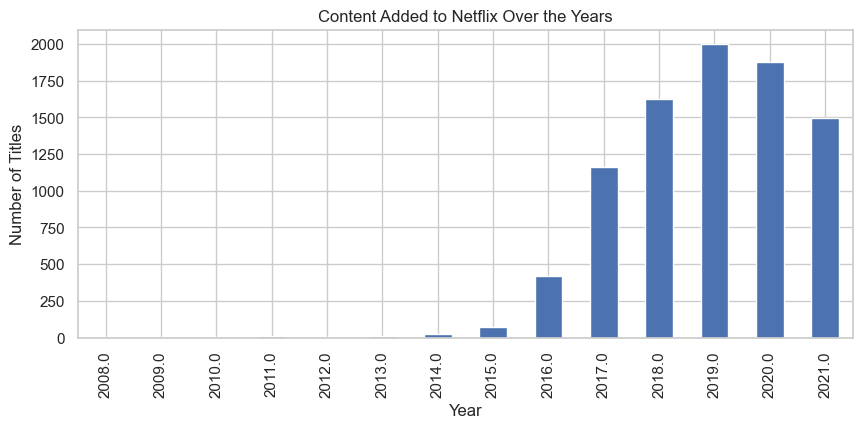

In [27]:
# Ensure 'date_added' column is in datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract the year
df['year_added'] = df['date_added'].dt.year

# Plot the number of titles added each year
df['year_added'].value_counts().sort_index().plot(kind='bar', figsize=(10, 4))
plt.title('Content Added to Netflix Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()


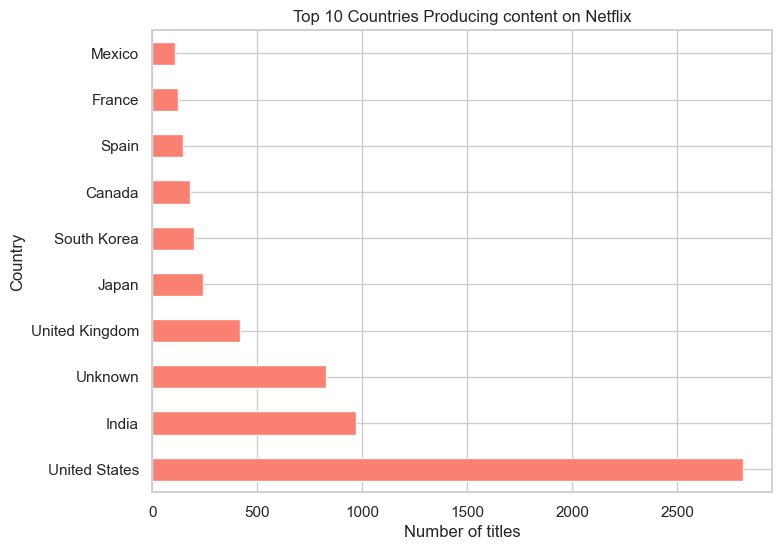

In [29]:
#Get the top 10 countries by content
df['country'] = df['country'].fillna('Unknown')
top_countries = df['country'].value_counts().head(10)
#plot graph
top_countries.plot(kind='barh',color ='salmon',figsize=(8,6))
plt.title('Top 10 Countries Producing content on Netflix')
plt.xlabel('Number of titles')
plt.ylabel('Country')
plt.show()

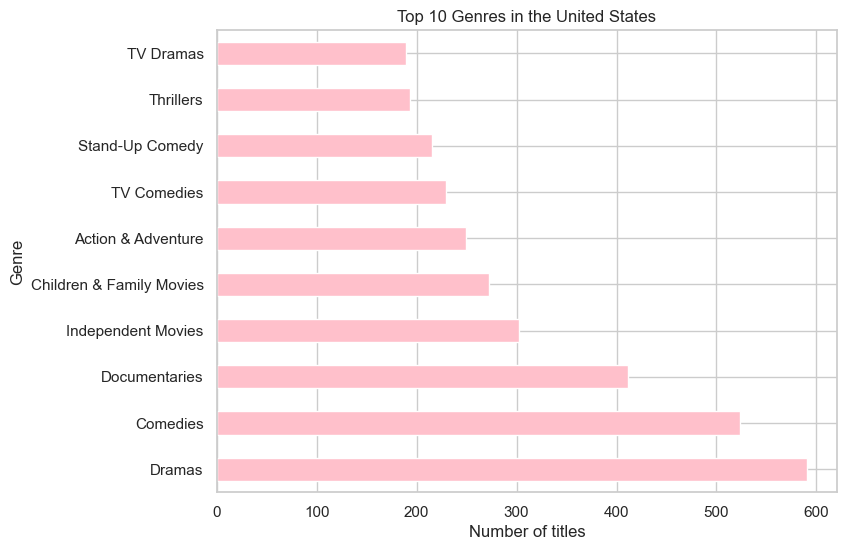

In [30]:
#create new column genres by splitting
df['genres'] = df['listed_in'].str.split(',').apply(lambda x:[i.strip() for i in x])
#Example: Most popular genres in the US
us_genres = df[df['country'] == 'United States']['genres'].explode().value_counts().head(10)
#plot top 10 genres 
us_genres.plot(kind='barh',color = 'pink',figsize=(8,6))
plt.title("Top 10 Genres in the United States")
plt.xlabel('Number of titles')
plt.ylabel('Genre')
plt.show()